## 이미지 데이터 로드

PCA의 목적은 데이터의 변화 방향 $W$ 벡터를 찾는 것으로 데이터가 어떤 방향으로 많이 변화하는가를 알 수 있다.

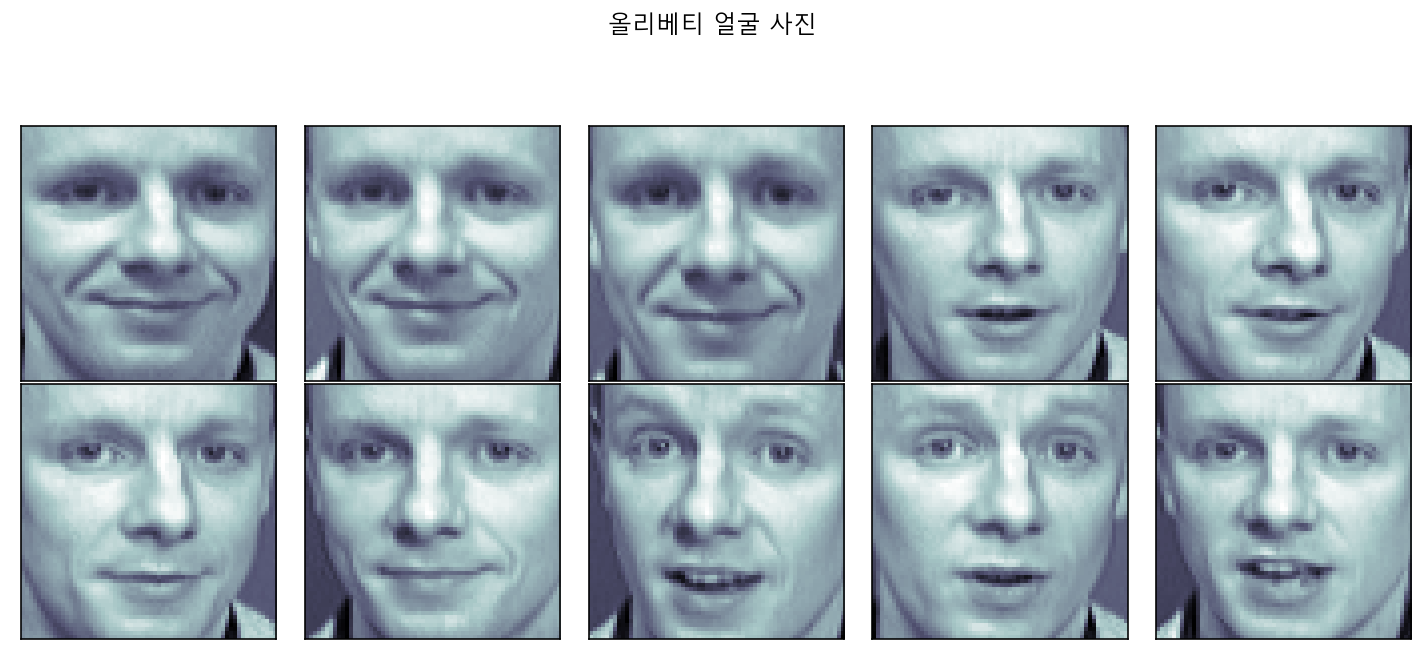

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 20 # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

In [5]:
# 이미지 데이터의 shape

faces[0].shape

(64, 64)

올리베티 이미지 데이터 벡터의 차원은 4096차원이다.

In [7]:
64 * 64

4096

## PCA 수행

In [9]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

PCA로 근사화한 이미지 출력

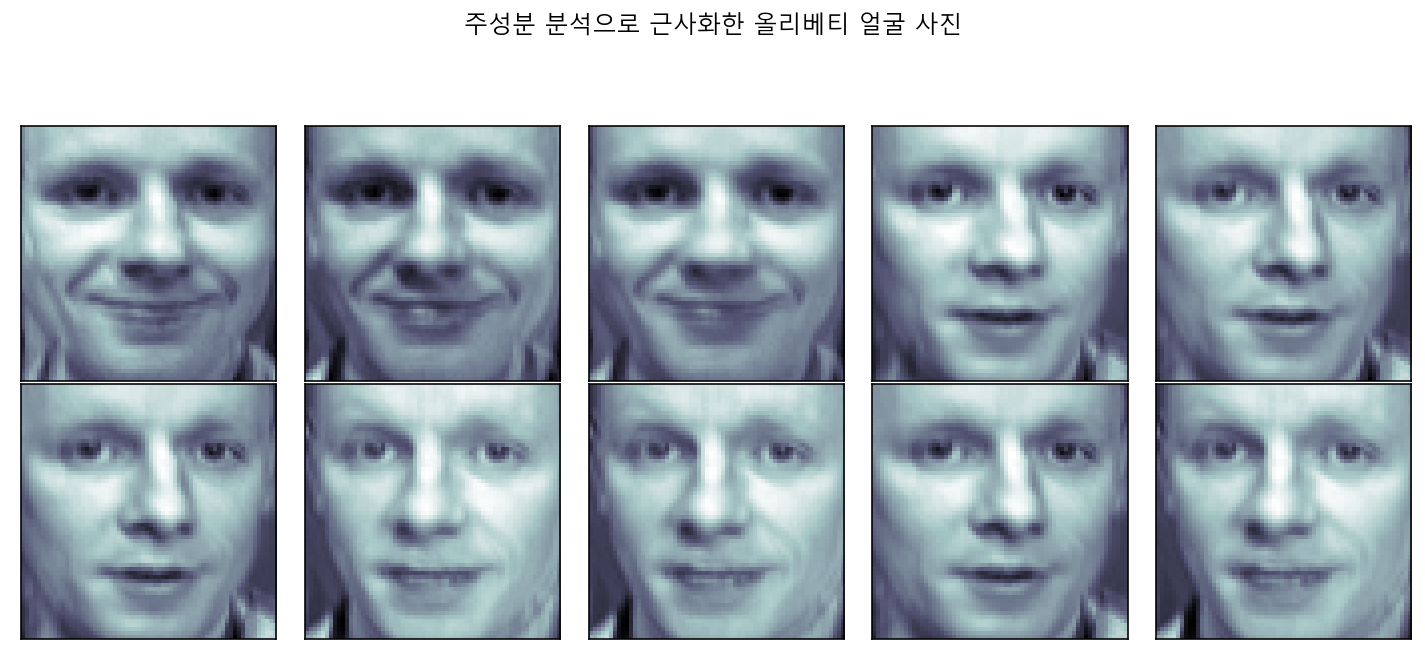

In [10]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

4096 차원의 이미지 데이터들을 2차원으로 차원을 축소하고 다시 4096차원으로 돌려 시각화 한 결과이다.

위 사진들은 모두 평균값과 2개의 주성분 얼굴의 선형조합으로 표현된다. 

이러한 주성분이 나타내는 얼굴을 아이겐페이스(Eigen Face)라고 한다.

그 이유는 특이분해의 오른쪽 특이벡터가 결국 분산행렬의 고유벡터에 해당하기 때문이다.

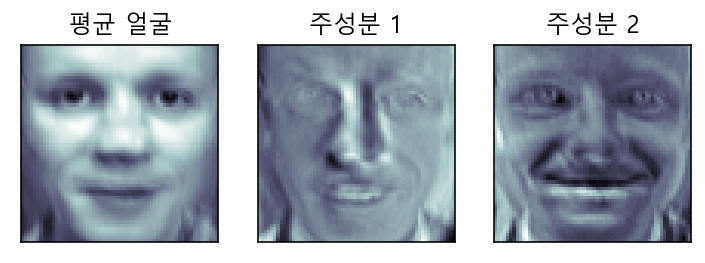

In [11]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")
plt.show()

주성분 1, 주성분 2는 2차원으로 PCA를 수행했기에 도출된 $w_1, w_2$ 벡터이다.

이는 원래 2차원이지만 다시 4096차원으로 돌려 이미지 데이터가 아닌 방향을 나타내는 벡터임에도 불구하고 이미지로 표현할 수 있는 것이다.

하지만 이 주성분 벡터만을 이용해서는 각각 $w$벡터가 어떤 의미를 가지는지 알기 어려워 평균벡터(평균얼굴))에 주성분 벡터를 더한 이미지를 출력한다.

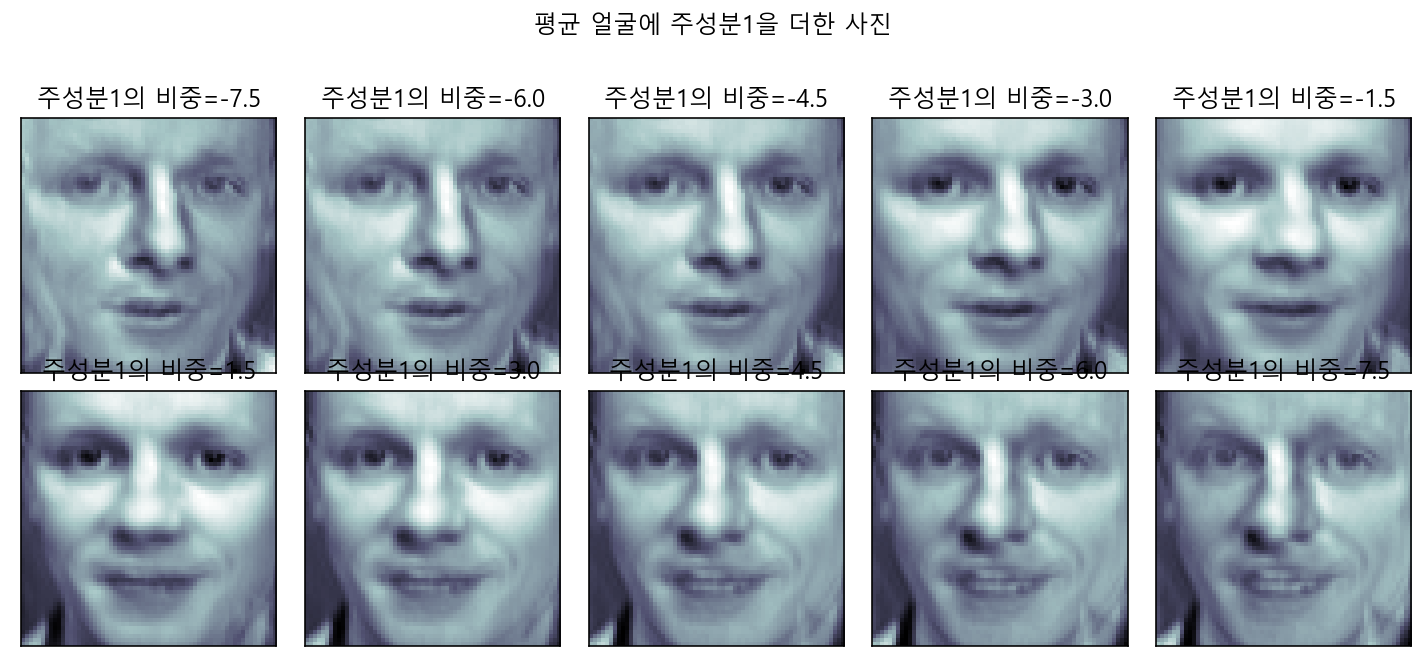

In [12]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w))
plt.suptitle("평균 얼굴에 주성분1을 더한 사진")
plt.tight_layout()
plt.show()

이처럼 평균이미지 $x_0$에 주성분벡터를 더해 새로운 이미지를 합성하는 것이 가능하다. 이렇게 이미지 합성을 통해서 각 $w$ 벡터에 따라 데이터의 방향이 어떻게 변화하는가? 에 대한 해답을 내놓을 수 있게 된다.

위 이미지들의 경우 고개의 방향이 가장 큰 차이인 것을 알 수 있다.

다음은 두번째 주성분 벡터에 평균벡터를 더한 결과이다.

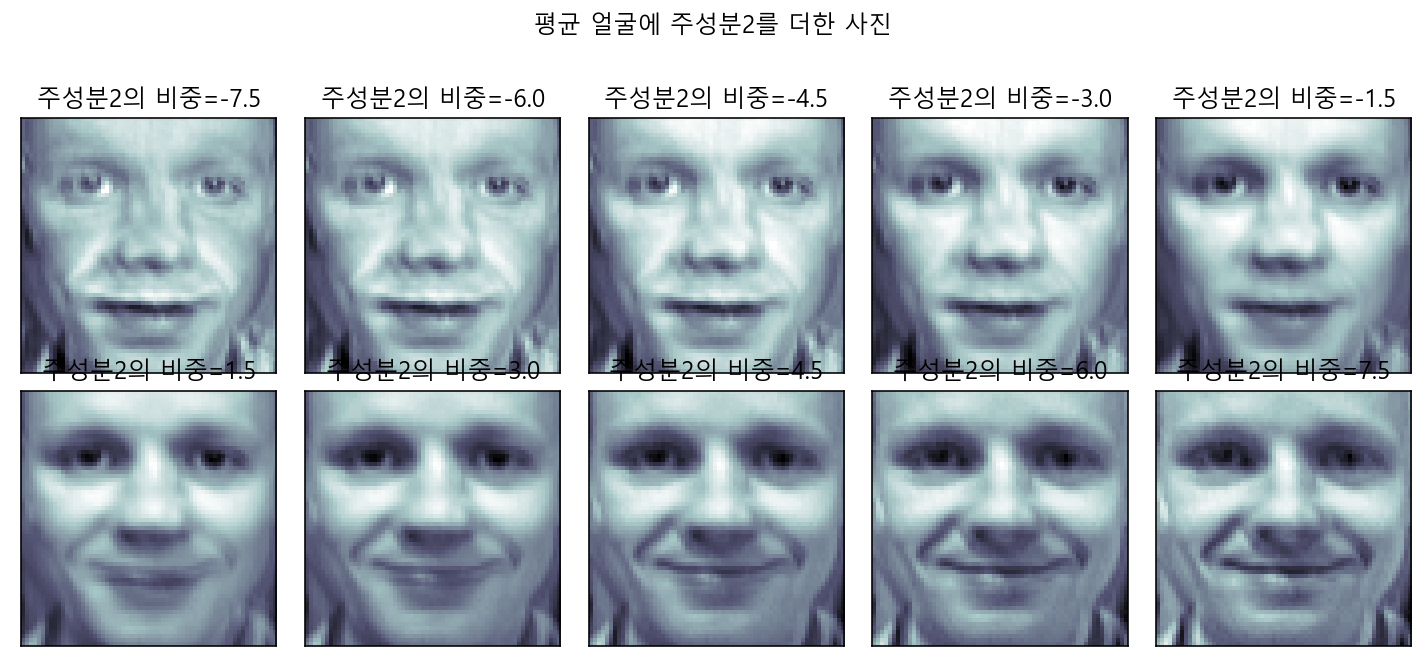

In [13]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분2의 비중={:.1f}".format(w))
plt.suptitle("평균 얼굴에 주성분2를 더한 사진")
plt.tight_layout()
plt.show()

이처럼 $w_1$벡터 다음으로 데이터가 가장 많이 변화하는 방향인 $w_2$ 벡터는 현재 데이터셋에서는 사람의 표정에 해당한다고 할 수 있다.